Name:


Student Number:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix 

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image

### Generate training data

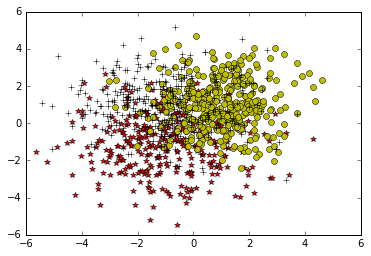

In [3]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

# Plot the data
col = ['r*','yo','k+', 'g*', 'b*']


for cl in range(3):
    cl_labels = np.array([y==cl]).flatten()
    X_cl = X[:,cl_labels]
    plt.plot(X_cl[0,:],X_cl[1,:],col[cl])
    
plt.axis([-6, 6, -6, 6])
plt.show()

## Plot the data. You should see something like (above).

## Fit the training data to the scikit-learn logistic regression classifier

In [4]:
def plot_confusion_matrix(cm, title='Confusion matrix', target_names = np.array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10'), cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[247  36  54]
 [ 32 244  59]
 [ 66  72 190]]


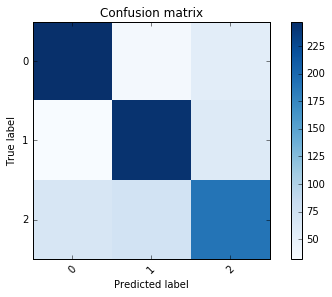

In [5]:
lr = logis(C=1e5, solver='lbfgs', multi_class='multinomial')
lr.fit(X.T,y) 

pr_labels=lr.predict(X.T)

cnf = confusion_matrix(y,pr_labels)
print(cnf)
plot_confusion_matrix(cnf,target_names=np.array(['0','1','2'],dtype='<U10'))

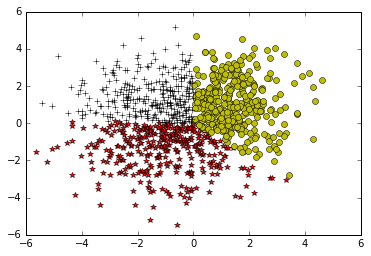

In [6]:
# Plot the data
col = ['r*','yo','k+', 'g*', 'b*']


for cl in range(3):
    cl_labels = np.array([pr_labels==cl]).flatten()
    X_cl = X[:,cl_labels]
    plt.plot(X_cl[0,:],X_cl[1,:],col[cl])
    
plt.axis([-6, 6, -6, 6])
plt.show()

# Now classify the MNIST digits

In [21]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

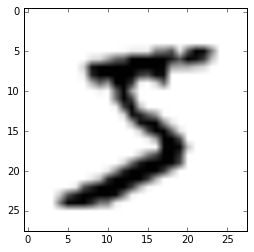

In [22]:
plt.imshow(X_train[0][0], cmap=cm.binary)
plt.show()

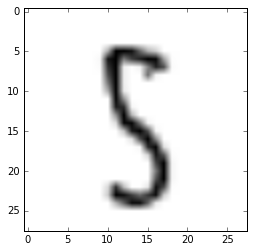

In [23]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


In [57]:
sh = X_train.shape
W_train = np.reshape(X_train,(sh[0],28*28))
lr = logis(C=1e5, solver='lbfgs', multi_class='multinomial')
lr.fit(W_train,y_train)
pr_labels=lr.predict(W_train)

[[4811    1   11    7   10   27   30    2   28    5]
 [   1 5548   25   16    3   20    4   10   43    8]
 [  24   50 4549   71   47   23   46   43   98   17]
 [  10   20  105 4640    7  143   11   40   92   33]
 [   7   16   26    7 4562    7   44   18   29  143]
 [  41   15   37  108   40 4060   62   13   98   32]
 [  25   10   27    1   31   57 4773    5   19    3]
 [   8   14   54   19   35   12    4 4876   13  140]
 [  25   76   55  114   20  118   33    8 4347   46]
 [  15   22   11   58   99   28    2  118   36 4599]]


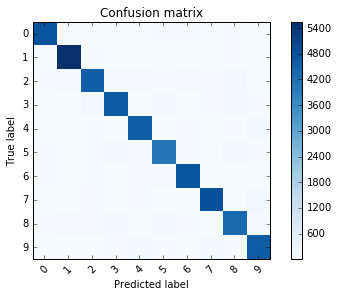

In [58]:
cnfm = confusion_matrix(y_train,pr_labels)
print(cnfm)
plot_confusion_matrix(cnfm,target_names=np.array(['0','1','2','3','4','5','6','7','8','9'],dtype='<U10'))

[[ 958    0    0    2    1    6    7    5    1    0]
 [   0 1112    4    2    0    2    3    2   10    0]
 [   4    9  937   15    7    4   14    7   31    4]
 [   4    1   20  916    2   23    4   11   22    7]
 [   2    1    6    3  910    0   10    5    8   37]
 [  10    2    4   31    8  783   13    5   31    5]
 [   9    3   10    1    6   17  908    3    1    0]
 [   1    7   25    8    6    1    0  947    3   30]
 [   7   10    9   19    7   28   14    8  859   13]
 [   9    7    0   10   25    6    0   20    8  924]]


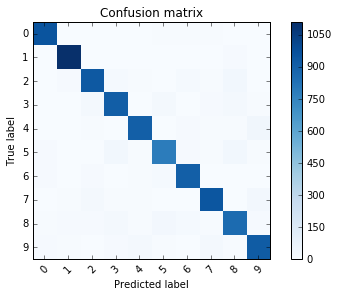

In [59]:
sh = X_test.shape
W_test = np.reshape(X_test,(sh[0],28*28))
pr_labels=lr.predict(W_test)
cnfm = confusion_matrix(y_test,pr_labels)
print(cnfm)
plot_confusion_matrix(cnfm,target_names=np.array(['0','1','2','3','4','5','6','7','8','9'],dtype='<U10'))


### Accuracy

In [60]:
acc = np.equal(y_test,pr_labels,dtype=int)
print(np.sum(acc)/acc.shape[0])

0.9254


# Extracting the weights and display as images.

In [61]:
weights = lr.coef_

w_im = np.reshape(weights,(10,28,28))


In [62]:
def show_weights(k=0):
    plt.imshow(w_im[k], cmap=cm.viridis)
    plt.show()

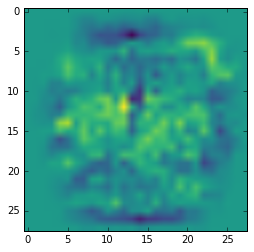

In [63]:
w = interact(show_weights, k =(0, 9)) 

In [64]:
from skimage import io
ic = io.ImageCollection('./softmax_mnist_weights/*.png')
def show_weights(k=0):
    plt.imshow(ic[k], cmap=cm.viridis)
    plt.show()

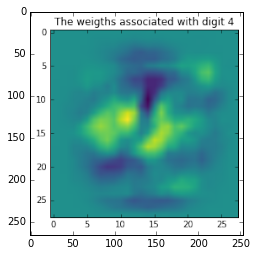

In [65]:
w = interact(show_weights, k =(0, 9)) 

In [66]:
ic = io.ImageCollection('./tensor_mnist_weights/*.png')
def show_weights(k=0):
    plt.imshow(ic[k], cmap=cm.viridis)
    plt.show()

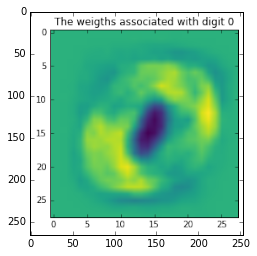

In [67]:
w = interact(show_weights, k =(0, 9)) 

In [79]:
lr = []
w_im = []
for regparam in range(-10,11):
    lr.append(logis(C=10**regparam, solver='lbfgs', multi_class='multinomial'))
    print(regparam, " ", lr[-1].C)
    lr[-1].fit(W_train,y_train)
    w_im.append(np.reshape(lr[-1].coef_,(10,28,28)))

-10   1e-10
-9   1e-09
-8   1e-08
-7   1e-07
-6   1e-06
-5   1e-05
-4   0.0001
-3   0.001
-2   0.01
-1   0.1
0   1
1   10
2   100
3   1000
4   10000
5   100000
6   1000000
7   10000000
8   100000000
9   1000000000
10   10000000000


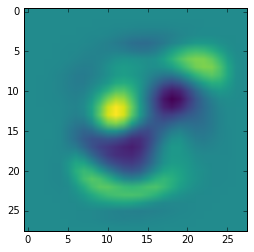

In [80]:
def show_weights_0(k=0):
    plt.imshow(w_im[k+10][5], cmap=cm.viridis)
    plt.show()
w = interact(show_weights_0, k =(-10, 10))